# Data science in practice - Project, MGT-415, 09.05.2020
## Aubry Yannick, Fontannaz Benoît, Muret Gabriel Pierre Etienne, Tedeschi Julien Brian, Terrier Cédric

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from math import sqrt
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

# Data importation, cleaning and analysis
The first step is the importation of the data in order to prepare it for the algorithm. Then the features are listed and explored. The dataset contains information about house sales in the small city of Ames in Iowa.

In [2]:
data = pd.read_csv('train.csv')
for name,dtype in zip(data.columns, data.dtypes):
    print(name,": ", dtype, "         Ex: ", data[name].iloc[0], "    Number of NaN: ", data[name].isnull().sum())

Id :  int64          Ex:  1     Number of NaN:  0
MSSubClass :  int64          Ex:  60     Number of NaN:  0
MSZoning :  object          Ex:  RL     Number of NaN:  0
LotFrontage :  float64          Ex:  65.0     Number of NaN:  259
LotArea :  int64          Ex:  8450     Number of NaN:  0
Street :  object          Ex:  Pave     Number of NaN:  0
Alley :  object          Ex:  nan     Number of NaN:  1369
LotShape :  object          Ex:  Reg     Number of NaN:  0
LandContour :  object          Ex:  Lvl     Number of NaN:  0
Utilities :  object          Ex:  AllPub     Number of NaN:  0
LotConfig :  object          Ex:  Inside     Number of NaN:  0
LandSlope :  object          Ex:  Gtl     Number of NaN:  0
Neighborhood :  object          Ex:  CollgCr     Number of NaN:  0
Condition1 :  object          Ex:  Norm     Number of NaN:  0
Condition2 :  object          Ex:  Norm     Number of NaN:  0
BldgType :  object          Ex:  1Fam     Number of NaN:  0
HouseStyle :  object          Ex: 

To have a better understanding of the real estate market in Ames a general overview of the dataset is required. Some information like the price distribution, the location or the types of houses are helpfull.

In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [5]:
for column in data:
    print(data[column].value_counts())

1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311


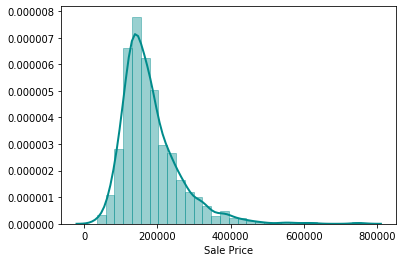

In [6]:
sns.distplot(data["SalePrice"], hist=True, kde=True, 
             bins=int(30), color = "darkcyan", 
             hist_kws={'edgecolor':'darkcyan'},
             kde_kws={'linewidth': 2})

plt.xlabel('Sale Price')

plt.savefig('PriceDistribution.png', bbox_inches='tight')




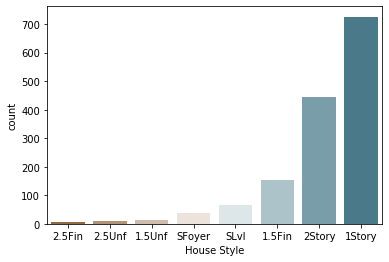

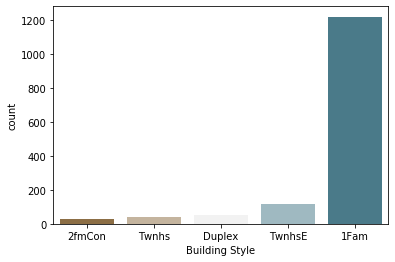

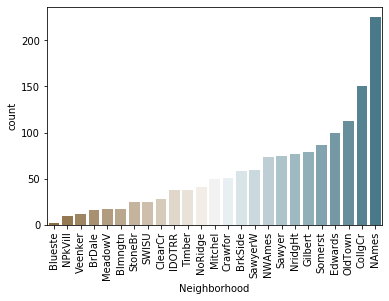

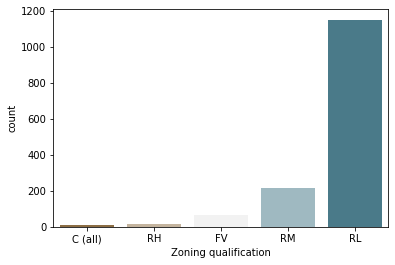

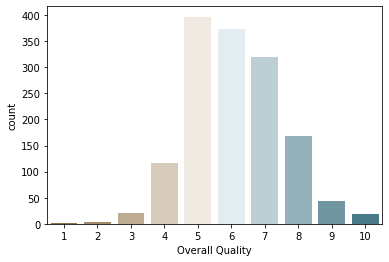

In [7]:
ax = sns.countplot(x="HouseStyle", data=data, order=data["HouseStyle"].value_counts().sort_values().index, palette = sns.diverging_palette(40, 220, n=8)) #comment changer la taille
plt.xlabel('House Style')
plt.savefig('HoustyleCount.png', bbox_inches='tight')
plt.show()


ax = sns.countplot(x="BldgType", data=data, order=data["BldgType"].value_counts().sort_values().index, palette = sns.diverging_palette(410, 220, n=5)) #comment changer la taille
plt.xlabel('Building Style')
plt.savefig('BldgTypeCount.png', bbox_inches='tight')
plt.show()


ax = sns.countplot(x="Neighborhood", data=data, order=data["Neighborhood"].value_counts().sort_values().index, palette = sns.diverging_palette(410, 220, n=25)) #comment changer la taille
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.savefig('NeighborhoodCount.png', bbox_inches='tight')
plt.show()

ax = sns.countplot(x="MSZoning", data=data, order=data["MSZoning"].value_counts().sort_values().index,palette =sns.diverging_palette(410, 220, n=5)) 
plt.xlabel('Zoning qualification')
plt.savefig('Zoning.png', bbox_inches='tight')
plt.show()

ax = sns.countplot(x="OverallQual", data=data, palette =sns.diverging_palette(410, 220, n=10)) 
plt.xlabel('Overall Quality')
plt.savefig('OverallQualCount.png', bbox_inches='tight')
plt.show()


# Data Cleaning
Given this analysis, we can notice that some features do not contain any valuable information, for example the ID column. For this reason the ID column will be droped from the test set

In addition of that, we notice that there is many missing values. The job here would be to differanciate missing values (errors in the dataset) from the absence of the concernate feature in the house.

In the first case some columns have a high amount of missing values and might be related to other column that are more complete. The columns with a significant amount of missing values are:

- LotFrontage: 259 NaN
- Alley: 1369 NaN
- FireplaceQu: 690 NaN
- PoolQC: 1453 NaN
- Fence: 1179 NaN
- MiscFeature: 1406 NaN

For LotFrontage, since there is difficult to have no frontage we assumed that the NaN values can be replaced by the median. For PoolQC and MiscFeature that have above 95% of missing values and taken into account that the features PoolArea and MiscVal were complete, it was possible to remowe the features. In the case of the others the NaN values were set to 0 since it is probable that they the houses do not have this feature.

For the same reason, all the lower missing value number were also set to 0.

In [8]:
#To many Nan and similar information is already contained in another column
data_cleaned=data.drop(columns=["Id","PoolQC","MiscFeature"] )  

data_cleaned['LotFrontage'] = data_cleaned['LotFrontage'].fillna(data_cleaned['LotFrontage'].median()) #Nan are replaced by the median 
data_cleaned['Alley'] = data_cleaned['Alley'].fillna(0) # there is no alley. Nan is set to 0
data_cleaned['MasVnrType'] = data_cleaned['MasVnrType'].fillna('None') # Object type fill Na with None
data_cleaned['MasVnrArea'] = data_cleaned['MasVnrArea'].fillna(0) # No Vnr so Area=0


# House has no basement
data_cleaned['BsmtQual'] = data_cleaned['BsmtQual'].fillna(0)
data_cleaned['BsmtCond'] = data_cleaned['BsmtCond'].fillna(0)
data_cleaned['BsmtExposure'] = data_cleaned['BsmtExposure'].fillna(0)
data_cleaned['BsmtFinType1'] = data_cleaned['BsmtFinType1'].fillna(0)
data_cleaned['BsmtFinType2'] = data_cleaned['BsmtFinType2'].fillna(0)
data_cleaned['BsmtCond'] = data_cleaned['BsmtCond'].fillna(0)


data_cleaned['Electrical'] = data_cleaned['Electrical'].fillna(0) # One house has no electricity

data_cleaned['FireplaceQu'] = data_cleaned['FireplaceQu'].fillna(0) # some house don't have a fire place

# these houses don't have a garage
data_cleaned['GarageType'] = data_cleaned['GarageType'].fillna(0)  
data_cleaned['GarageYrBlt'] = data_cleaned['GarageYrBlt'].fillna(0) 
data_cleaned['GarageFinish'] = data_cleaned['GarageFinish'].fillna(0) 
data_cleaned['GarageQual'] = data_cleaned['GarageQual'].fillna(0) 
data_cleaned['GarageCond'] = data_cleaned['GarageCond'].fillna(0) 

data_cleaned['Fence'] = data_cleaned['Fence'].fillna(0) #no fence

for name,dtype in zip(data_cleaned.columns, data_cleaned.dtypes):
    print(name,": ", dtype, "         Ex: ", data_cleaned[name].iloc[0], "    Number of NaN: ", data_cleaned[name].isnull().sum())

MSSubClass :  int64          Ex:  60     Number of NaN:  0
MSZoning :  object          Ex:  RL     Number of NaN:  0
LotFrontage :  float64          Ex:  65.0     Number of NaN:  0
LotArea :  int64          Ex:  8450     Number of NaN:  0
Street :  object          Ex:  Pave     Number of NaN:  0
Alley :  object          Ex:  0     Number of NaN:  0
LotShape :  object          Ex:  Reg     Number of NaN:  0
LandContour :  object          Ex:  Lvl     Number of NaN:  0
Utilities :  object          Ex:  AllPub     Number of NaN:  0
LotConfig :  object          Ex:  Inside     Number of NaN:  0
LandSlope :  object          Ex:  Gtl     Number of NaN:  0
Neighborhood :  object          Ex:  CollgCr     Number of NaN:  0
Condition1 :  object          Ex:  Norm     Number of NaN:  0
Condition2 :  object          Ex:  Norm     Number of NaN:  0
BldgType :  object          Ex:  1Fam     Number of NaN:  0
HouseStyle :  object          Ex:  2Story     Number of NaN:  0
OverallQual :  int64       

In [9]:
# converting all the object to int. For some quality feature the ranking is respected. A higher score represents a higher quality.
data_cleaned['MSZoning'] = data_cleaned['MSZoning'].replace("C (all)", 0).replace("RH", 1).replace("RM", 2).replace("RL", 3).replace("FV", 4)
data_cleaned['Street'] = data_cleaned['Street'].replace("Grvl", 1).replace("Pave", 2)
data_cleaned['Alley'] = data_cleaned['Alley'].replace("Grvl", 1).replace("Pave", 2)
data_cleaned['LotShape'] = data_cleaned['LotShape'].replace("Reg", 0).replace("IR1", 1).replace("IR2", 2).replace("IR3", 3) #retrouver le petit quartier pour adapter les codes
data_cleaned['LandContour'] = data_cleaned['LandContour'].replace("Low", 0).replace("HLS", 1).replace("Bnk", 2).replace("Lvl", 3) #A voir si les valeur ont du sens
data_cleaned['Utilities'] = data_cleaned['Utilities'].replace("NoSeWa", 0).replace("AllPub", 1)
data_cleaned['LotConfig'] = data_cleaned['LotConfig'].replace("Inside", 0).replace("Corner", 1).replace("FR2", 2).replace("FR3", 3).replace("CulDSac", 4)
data_cleaned['LandSlope'] = data_cleaned['LandSlope'].replace("Sev", 0).replace("Mod", 1).replace("Gtl", 2)
data_cleaned['Neighborhood'] = data_cleaned['Neighborhood'].replace("NAmes", 0).replace("CollgCr",1).replace("OldTown",2).replace("Edwards",3).replace("Somerst", 4).replace("Gilbert", 5).replace("NridgHt", 6).replace("Sawyer", 7).replace("NWAmes",8).replace("SawyerW", 9).replace("BrkSide",10).replace("Crawfor",11).replace("Mitchel",12).replace("NoRidge", 13).replace("Timber", 14).replace("IDOTRR", 15).replace("ClearCr",16).replace("SWISU", 17).replace("StoneBr", 18).replace("Blmngtn", 19).replace("MeadowV", 20).replace("BrDale", 21).replace("Veenker", 22).replace("NPkVill", 23).replace("Blueste", 24)

data_cleaned['Condition1'] = data_cleaned['Condition1'].replace("Norm", 0).replace("Feedr", 1).replace("Artery", 2).replace("RRAn", 3).replace("PosN", 4).replace("RRAe", 5).replace("PosA", 6).replace("RRNn", 7).replace("RRNe", 8)
data_cleaned['Condition2'] = data_cleaned['Condition2'].replace("Norm", 0).replace("Feedr", 1).replace("Artery", 2).replace("RRAn", 3).replace("PosN", 4).replace("RRAe", 5).replace("PosA", 6).replace("RRNn", 7).replace("RRNe", 8)

data_cleaned['BldgType'] = data_cleaned['BldgType'].replace("1Fam", 0).replace("TwnhsE", 1).replace("Duplex", 2).replace("Twnhs", 3).replace("2fmCon", 4)
data_cleaned['HouseStyle'] = data_cleaned['HouseStyle'].replace("1Story", 0).replace("2Story", 1).replace("1.5Fin", 2).replace("SLvl", 3).replace("SFoyer", 4).replace("1.5Unf", 5).replace("2.5Unf", 6).replace("2.5Fin", 7)

data_cleaned['RoofStyle'] = data_cleaned['RoofStyle'].replace("Gable", 0).replace("Hip", 1).replace("Flat", 2).replace("Gambrel", 3).replace("Mansard", 4).replace("Shed", 5)
data_cleaned['RoofMatl'] = data_cleaned['RoofMatl'].replace("CompShg", 0).replace("Tar&Grv", 1).replace("MetalSd", 2).replace("WdShngl", 3).replace("WdShake", 4).replace("ClyTile",6).replace("Membran", 6).replace("Roll", 7).replace("Metal", 8)

data_cleaned['Exterior1st'] = data_cleaned['Exterior1st'].replace("VinylSd", 0).replace("HdBoard", 1).replace("MetalSd", 2).replace("Wd Sdng", 3).replace("Plywood", 4).replace("CemntBd",5).replace("BrkFace", 6).replace("WdShing", 7).replace("Stucco", 8).replace("AsbShng", 9).replace("Stone",10).replace("BrkComm", 11).replace("CBlock", 12).replace("ImStucc", 13).replace("AsphShn", 14)
data_cleaned['Exterior2nd'] = data_cleaned['Exterior2nd'].replace("VinylSd", 0).replace("HdBoard", 1).replace("MetalSd", 2).replace("Wd Sdng", 3).replace("Plywood", 4).replace("CemntBd",5).replace("BrkFace", 6).replace("Wd Shng", 7).replace("Stucco", 8).replace("AsbShng", 9).replace("Stone",10).replace("BrkComm", 11).replace("CBlock", 12).replace("ImStucc", 13).replace("AsphShn", 14).replace("CmentBd", 15).replace("Wd Shbg", 16).replace("Brk Cmn", 17).replace("Other", 18)

data_cleaned['MasVnrType'] = data_cleaned["MasVnrType"].replace("None", 0).replace("BrkFace", 1).replace("Stone", 2).replace("BrkCmn", 3) #Classer

data_cleaned['ExterQual'] = data_cleaned['ExterQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['ExterCond'] = data_cleaned['ExterQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)

data_cleaned['Foundation'] = data_cleaned['Foundation'].replace("PConc", 0).replace("CBlock", 1).replace("BrkTil", 2).replace("Slab", 3).replace("Stone", 4).replace("Wood",5) #A adapter Ordre décroissant
data_cleaned['BsmtQual'] = data_cleaned['BsmtQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5) #Droper NA et classer dans l'ordre 
data_cleaned['BsmtCond'] = data_cleaned['BsmtCond'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5) # la même jusqu'à Total jusqu'au heat
data_cleaned['BsmtExposure'] = data_cleaned['BsmtExposure'].replace("No", 1).replace("Mn", 2).replace("Av", 3).replace("Gd", 4)
data_cleaned['BsmtFinType1'] = data_cleaned['BsmtFinType1'].replace("Unf", 1).replace("LwQ", 2).replace("Rec", 3).replace("BLQ", 4).replace("ALQ", 5).replace("GLQ", 6)
data_cleaned['BsmtFinType2'] = data_cleaned['BsmtFinType2'].replace("Unf", 1).replace("LwQ", 2).replace("Rec", 3).replace("BLQ", 4).replace("ALQ", 5).replace("GLQ", 6)

data_cleaned['Heating'] = data_cleaned['Heating'].replace("Wall", 1).replace("OthW", 2).replace("Grav", 3).replace("GasW", 4).replace("GasA", 5).replace("Floor", 6) #Chaufage au sol meilleur et 0 si pas de chauffage
data_cleaned['HeatingQC'] = data_cleaned['HeatingQC'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['CentralAir'] = data_cleaned['CentralAir'].replace("Y", 1).replace("N", 0)
data_cleaned['Electrical'] = data_cleaned['Electrical'].replace("SBrkr", 1).replace("FuseA", 2).replace("FuseF", 3).replace("FuseP", 4).replace("Mix", 5) 
data_cleaned['KitchenQual'] = data_cleaned['KitchenQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5) 
data_cleaned['Functional'] = data_cleaned['Functional'].replace("Typ", 0).replace("Min2", 1).replace("Min1", 2).replace("Mod", 3).replace("Maj1", 4).replace("Maj2", 5).replace("Sev",6)
data_cleaned['FireplaceQu'] = data_cleaned['FireplaceQu'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['GarageType'] = data_cleaned['GarageType'].replace("Attchd", 1).replace("Detchd", 2).replace("BuiltIn", 3).replace("Basment", 4).replace("CarPort", 5).replace("2Types", 6) 
data_cleaned['GarageFinish'] = data_cleaned['GarageFinish'].replace("Unf", 1).replace("RFn", 2).replace("Fin", 3)
data_cleaned['GarageQual'] = data_cleaned['GarageQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['GarageCond'] = data_cleaned['GarageCond'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['PavedDrive'] = data_cleaned['PavedDrive'].replace("N", 0).replace("P", 1).replace("Y", 2) 

# PoolQC was removed earlier: data_cleaned['PoolQC'] = data_cleaned['PoolQC'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)

data_cleaned['Fence'] = data_cleaned['Fence'].replace("MnWw", 1).replace("GdWo", 2).replace("MnPrv", 3).replace("GdPrv", 4) 

# Misc Feature was remove earlier: data_cleaned['MiscFeature'] = data_cleaned['MiscFeature'].replace("Othr", 1).replace("Shed", 2).replace("Gar2", 3).replace("TenC", 4).replace("Elev", 5)

data_cleaned['SaleType'] = data_cleaned['SaleType'].replace("WD", 0).replace("New", 1).replace("COD", 2).replace("ConLD", 3).replace("ConLw", 4).replace("ConLI", 5).replace("CWD", 6).replace("Oth", 7).replace("Con",8)
data_cleaned['SaleCondition'] = data_cleaned['SaleCondition'].replace("Normal", 0).replace("Partial",1).replace("Abnorml", 2).replace("Family", 3).replace("Alloca", 4).replace("AdjLand", 5)

In [10]:
# check that no object and no Nan is remaining
for name,dtype in zip(data_cleaned.columns, data_cleaned.dtypes):
    print(name,": ", dtype, "         Ex: ", data_cleaned[name].iloc[0], "    Number of NaN: ", data_cleaned[name].isnull().sum())

for column in data_cleaned:
    print("---------------\n", data_cleaned[column].value_counts())

MSSubClass :  int64          Ex:  60     Number of NaN:  0
MSZoning :  int64          Ex:  3     Number of NaN:  0
LotFrontage :  float64          Ex:  65.0     Number of NaN:  0
LotArea :  int64          Ex:  8450     Number of NaN:  0
Street :  int64          Ex:  2     Number of NaN:  0
Alley :  int64          Ex:  0     Number of NaN:  0
LotShape :  int64          Ex:  0     Number of NaN:  0
LandContour :  int64          Ex:  3     Number of NaN:  0
Utilities :  int64          Ex:  1     Number of NaN:  0
LotConfig :  int64          Ex:  0     Number of NaN:  0
LandSlope :  int64          Ex:  2     Number of NaN:  0
Neighborhood :  int64          Ex:  1     Number of NaN:  0
Condition1 :  int64          Ex:  0     Number of NaN:  0
Condition2 :  int64          Ex:  0     Number of NaN:  0
BldgType :  int64          Ex:  0     Number of NaN:  0
HouseStyle :  int64          Ex:  1     Number of NaN:  0
OverallQual :  int64          Ex:  7     Number of NaN:  0
OverallCond :  int64 

 0    1267
1     122
2      43
3       9
5       5
4       5
6       4
7       3
8       2
Name: SaleType, dtype: int64
---------------
 0    1198
1     125
2     101
3      20
4      12
5       4
Name: SaleCondition, dtype: int64
---------------
 140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64


In [11]:
print(data.shape)
print(data_cleaned.shape)
data_cleaned.describe()

(1460, 81)
(1460, 78)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,2.852740,69.863699,10516.828082,1.995890,0.090411,0.408219,2.814384,0.999315,0.510274,...,3.409589,15.060959,2.758904,0.565753,43.489041,6.321918,2007.815753,0.233562,0.311644,180921.195890
std,42.300571,0.527086,22.027677,9981.264932,0.063996,0.372151,0.582296,0.606509,0.026171,1.050750,...,29.317331,55.757415,40.177307,1.204483,496.123024,2.703626,1.328095,0.793805,0.767397,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7553.500000,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000,0.000000,129975.000000
50%,50.000000,3.000000,69.000000,9478.500000,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,0.000000,163000.000000
75%,70.000000,3.000000,79.000000,11601.500000,2.000000,0.000000,1.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,0.000000,0.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,2.000000,2.000000,3.000000,3.000000,1.000000,4.000000,...,508.000000,480.000000,738.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


# Data Exploration
Some features are more correlated than others with the sale price

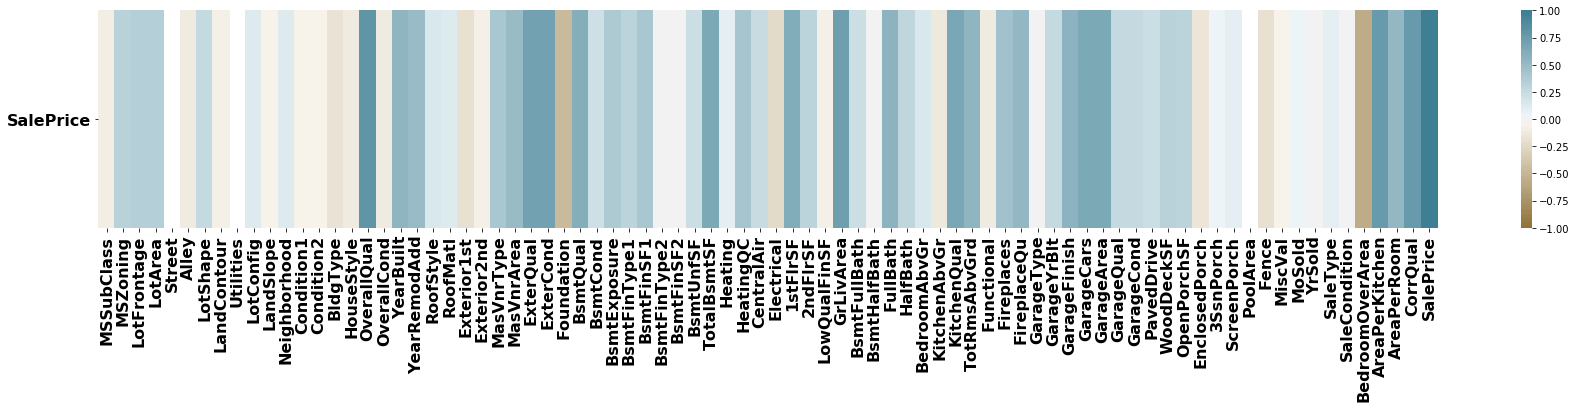

In [50]:
f,ax=plt.subplots(figsize=(30,4))
corr = data_cleaned.corr()
ax = sns.heatmap(corr.sort_values(by=['SalePrice'], ascending=False).head(1),
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(420, 220, n=100),
square=False)

plt.xticks(weight='bold', fontsize=16)
plt.yticks(weight='bold', rotation=0, fontsize=16)
plt.savefig('EDACorr.png',bbox_inches='tight')


In [13]:
corr = data_cleaned.corr()
corrVal=corr["SalePrice"].sort_values(ascending=False).to_frame()
corrVal[30:78]

,SalePrice
GarageQual,0.273839
LotShape,0.267759
LotArea,0.263843
GarageCond,0.263191
GarageYrBlt,0.261366
CentralAir,0.251328
PavedDrive,0.231357
BsmtFullBath,0.227122
BsmtUnfSF,0.214479
BsmtCond,0.212607


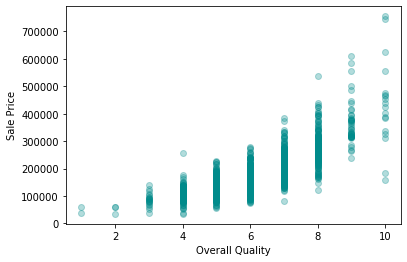

C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


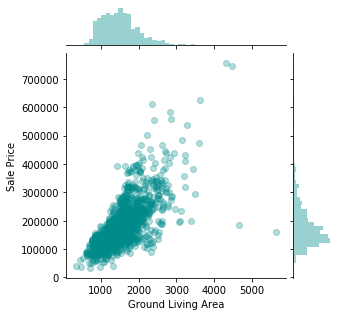

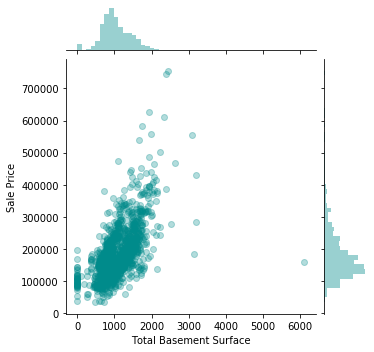

In [14]:
#example of correlated data
plt.scatter(data_cleaned["OverallQual"], data_cleaned["SalePrice"], color="darkcyan", alpha=0.3)
#plt.title('Sale Price vs Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.savefig('PriceOverallQual.png',bbox_inches='tight')
plt.show()


h=sns.jointplot(x=data_cleaned["GrLivArea"], y=data_cleaned["SalePrice"], color="darkcyan", alpha=0.3, size=4.5)
h.ax_joint.set_xlabel('Ground Living Area')
h.ax_joint.set_ylabel('Sale Price')
plt.savefig('PriceGrLivArea.png', bbox_inches='tight')

h=sns.jointplot(x=data_cleaned["TotalBsmtSF"], y=data_cleaned["SalePrice"], color="darkcyan", alpha=0.3, size=5)
h.ax_joint.set_xlabel('Total Basement Surface')
h.ax_joint.set_ylabel('Sale Price')
plt.savefig('PriceTotalBsmtSF.png',bbox_inches='tight')

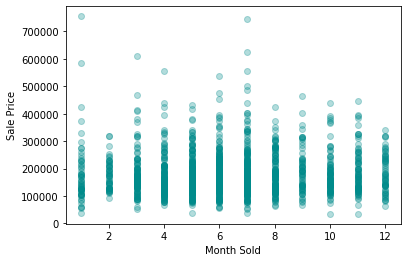

In [15]:
# no correlation example
plt.scatter(data_cleaned["MoSold"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
#plt.title('Sale Price vs Overall Condition')
plt.xlabel('Month Sold')
plt.ylabel('Sale Price')
plt.savefig('PriceMoSold.png',bbox_inches='tight')
plt.show()


Event if neighborhood is also not really correlated with the saleprice but this information could be important for the business. It can tell on which quarter we have to focus our business in order to make bigger profits

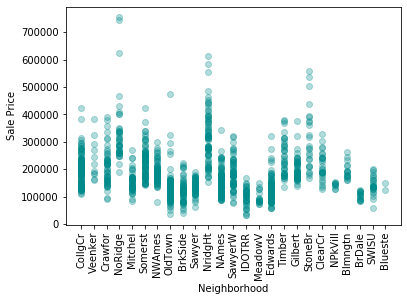

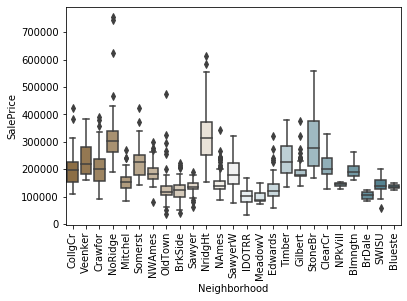

In [16]:
data_cleaned['Neighborhood'] = data_cleaned['Neighborhood'].replace(0,"NAmes").replace(1,"CollgCr").replace(2,"OldTown").replace(3,"Edwards").replace(4,"Somerst").replace(5,"Gilbert").replace(6,"NridgHt").replace(7,"Sawyer").replace(8,"NWAmes").replace(9,"SawyerW").replace(10,"BrkSide").replace(11,"Crawfor").replace(12,"Mitchel").replace(13,"NoRidge").replace(14,"Timber").replace(15,"IDOTRR").replace(16,"ClearCr").replace(17,"SWISU").replace(18,"StoneBr").replace(19,"Blmngtn").replace(20,"MeadowV").replace(21,"BrDale").replace(22,"Veenker").replace(23,"NPkVill").replace(24,"Blueste")

plt.scatter(data_cleaned["Neighborhood"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.savefig('PriceNeighborhood.png',bbox_inches='tight')
plt.show()


NeighborhoodMedian=data_cleaned.groupby('Neighborhood', as_index=False)["SalePrice"].median()
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=data_cleaned, palette = sns.diverging_palette(410, 220, n=25))
plt.xticks(rotation=90)
plt.savefig('PriceNeighborhoodBoxPlot.png',bbox_inches='tight')


data_cleaned['Neighborhood'] = data_cleaned['Neighborhood'].replace("NAmes", 0).replace("CollgCr",1).replace("OldTown",2).replace("Edwards",3).replace("Somerst", 4).replace("Gilbert", 5).replace("NridgHt", 6).replace("Sawyer", 7).replace("NWAmes",8).replace("SawyerW", 9).replace("BrkSide",10).replace("Crawfor",11).replace("Mitchel",12).replace("NoRidge", 13).replace("Timber", 14).replace("IDOTRR", 15).replace("ClearCr",16).replace("SWISU", 17).replace("StoneBr", 18).replace("Blmngtn", 19).replace("MeadowV", 20).replace("BrDale", 21).replace("Veenker", 22).replace("NPkVill", 23).replace("Blueste", 24)


In [17]:
NeighborhoodMedian.sort_values(by=['SalePrice'], ascending=False).head(30)

,Neighborhood,SalePrice
16,NridgHt,315000
15,NoRidge,301500
22,StoneBr,278000
23,Timber,228475
21,Somerst,225500
24,Veenker,218000
6,Crawfor,200624
4,ClearCr,200250
5,CollgCr,197200
0,Blmngtn,191000


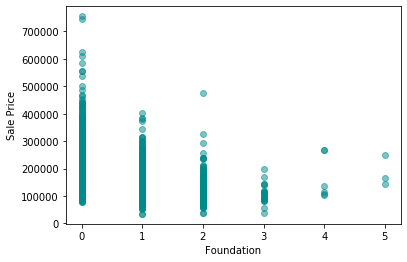

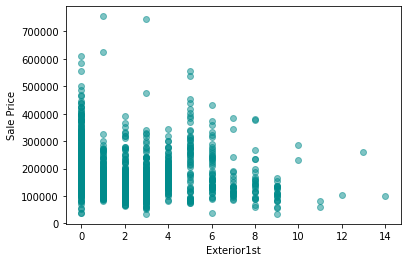

In [18]:
#other are negatively correlated which is also usefull
plt.scatter(data_cleaned["Foundation"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.5)
plt.ylabel('Sale Price')
plt.xlabel('Foundation')
plt.savefig('PriceFoundation.png',bbox_inches='tight')
plt.show()


plt.scatter(data_cleaned["Exterior1st"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.5)
plt.ylabel('Sale Price')
plt.xlabel('Exterior1st')
plt.savefig('PriceExterior1st.png',bbox_inches='tight')
plt.show()


# Outliers removing
From the previous graphs some scatter points could be identified as outliers. They were are now removed with DBSCAN

In [19]:
X = StandardScaler().fit_transform(data_cleaned.values)

db = DBSCAN(eps=12.0, min_samples=10).fit(X)
labels = db.labels_

print(pd.Series(labels).value_counts())
data_cleaned["Outliers"]=labels
data_cleaned = data_cleaned[data_cleaned.Outliers != -1]
data_cleaned=data_cleaned.drop(columns=["Outliers"] )

 0    1418
-1      42
dtype: int64


# Feature engineering

,SalePrice
SalePrice,1.000000
CorrQual,0.772110
AreaPerKitchen,0.764258
AreaPerRoom,0.535075
BathOverArea,0.027608
BathOverAreaWithBsmt,-0.003298
BedroomOverArea,-0.559298


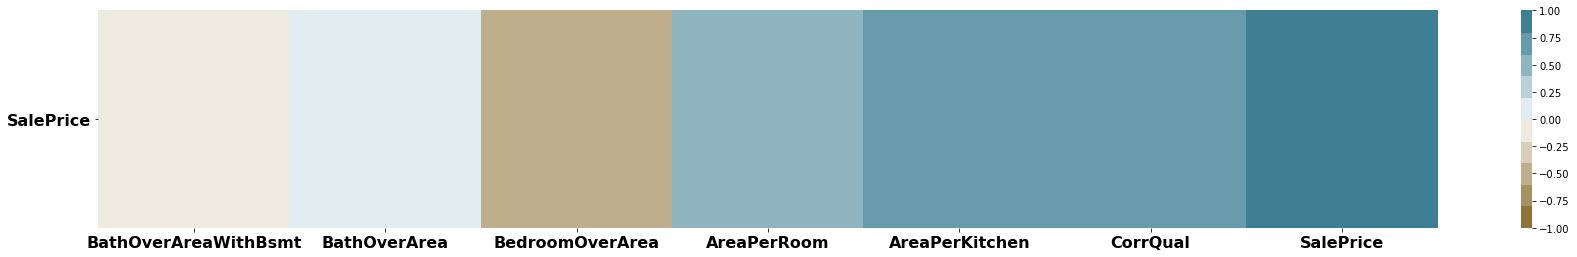

In [51]:
#new features
data_cleaned["BathOverAreaWithBsmt"]=(data_cleaned["BsmtFullBath"]+data_cleaned["BsmtHalfBath"]+data_cleaned["FullBath"]+data_cleaned["HalfBath"])/(data_cleaned["TotalBsmtSF"]+data_cleaned["GrLivArea"])
data_cleaned["BathOverArea"]=(data_cleaned["FullBath"]+data_cleaned["HalfBath"])/(data_cleaned["GrLivArea"])
data_cleaned["BedroomOverArea"]=(data_cleaned["BedroomAbvGr"]/data_cleaned["GrLivArea"])
data_cleaned["AreaPerKitchen"]=1/(data_cleaned["KitchenAbvGr"]/data_cleaned["GrLivArea"])
data_cleaned["AreaPerRoom"]=1/(data_cleaned["TotRmsAbvGrd"]/data_cleaned["GrLivArea"])
#Quality based feature with high correlation feature
data_cleaned["CorrQual"]=(data_cleaned["ExterCond"]+data_cleaned["ExterQual"]+data_cleaned["KitchenQual"]+data_cleaned["BsmtQual"]+data_cleaned["BsmtCond"]+data_cleaned["FireplaceQu"])/6


#correlation of the new features
New_data=data_cleaned[["BathOverAreaWithBsmt", "BathOverArea", "BedroomOverArea", "AreaPerRoom", "AreaPerKitchen","CorrQual","SalePrice"]]
New_data.head()
f,ax=plt.subplots(figsize=(30,4))
corr = New_data.corr()
ax = sns.heatmap(corr.sort_values(by=['SalePrice'], ascending=False).head(1),
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(420, 220, n=10),
square=False)

plt.xticks(weight='bold', fontsize=16)
plt.yticks(weight='bold', rotation=0, fontsize=16)
plt.savefig('CorrNewFeatures.png',bbox_inches='tight')


corrVal=corr["SalePrice"].sort_values(ascending=False).to_frame()
corrVal.head(8)

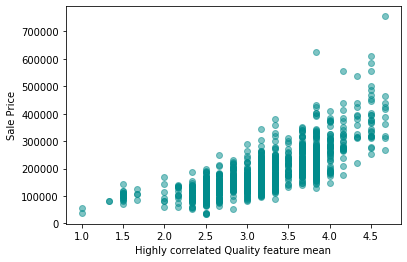

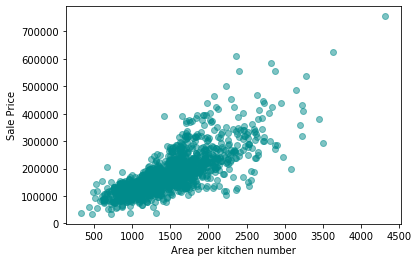

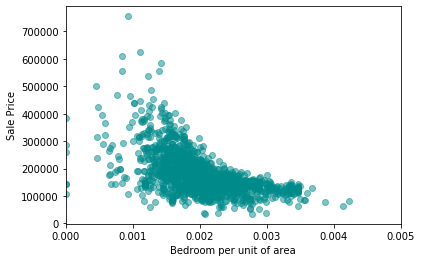

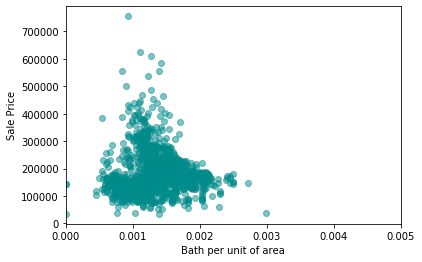

In [21]:
# example of plots of some new feature


# positive correlation
plt.scatter(data_cleaned["CorrQual"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.5)
plt.ylabel('Sale Price')
plt.xlabel('Highly correlated Quality feature mean')
plt.savefig('PriceCorrQual.png',bbox_inches='tight')
plt.show()


plt.scatter(data_cleaned["AreaPerKitchen"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.5)
plt.ylabel('Sale Price')
#plt.xlim(0, 0.004)
plt.xlabel('Area per kitchen number')
plt.savefig('PriceKitchenArea.png',bbox_inches='tight')
plt.show()


#negative correlation
plt.scatter(data_cleaned["BedroomOverArea"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.5)
plt.ylabel('Sale Price')
plt.xlim(0, 0.005)
plt.xlabel('Bedroom per unit of area')
plt.savefig('PriceBedroomArea.png',bbox_inches='tight')
plt.show()


# no correlation
plt.scatter(data_cleaned["BathOverArea"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.5)
plt.ylabel('Sale Price')
plt.xlim(0, 0.005)
plt.xlabel('Bath per unit of area')
plt.savefig('PriceBathArea.png',bbox_inches='tight')
plt.show()


In [22]:
# removing the non correlated new features
datSalePrice = data_cleaned['SalePrice']
data_cleaned = data_cleaned.drop(columns=["SalePrice"])
data_cleaned = data_cleaned.drop(columns=["BathOverArea","BathOverAreaWithBsmt"])
data_cleaned['SalePrice'] = datSalePrice
data_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BedroomOverArea,AreaPerKitchen,AreaPerRoom,CorrQual,SalePrice
0,60,3,65.0,8450,2,0,0,3,1,0,...,0,2,2008,0,0,0.001754,1710.0,213.750000,3.166667,208500
1,20,3,80.0,9600,2,0,0,3,1,2,...,0,5,2007,0,0,0.002377,1262.0,210.333333,3.166667,181500
2,60,3,68.0,11250,2,0,1,3,1,0,...,0,9,2008,0,0,0.001680,1786.0,297.666667,3.666667,223500
3,70,3,60.0,9550,2,0,1,3,1,1,...,0,2,2006,0,2,0.001747,1717.0,245.285714,3.500000,140000
4,60,3,84.0,14260,2,0,1,3,1,2,...,0,12,2008,0,0,0.001820,2198.0,244.222222,3.666667,250000


In [23]:
columns_X_train = data_cleaned.columns
print(columns_X_train)
x = data_cleaned.iloc[:, 0:len(data_cleaned.columns)-1].to_numpy()
y = data_cleaned['SalePrice'].to_numpy()
print(x)
# Train test split
train_test_ratio = 0.2

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=train_test_ratio, random_state=42)

print("Train: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Scaling and PCA

To perform a PCA, the data should first be normalised. To do so, the data are scaled using their minimum and maximum values.
The dataset must be also divided in a train and test set.

In [24]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Then the PCA is done. The explained variance ratio provides the amount of variance explained by each dimensions of the problem. These dimensions do not have clear meanings in our problem. 80% of the sale price could be explained by only 22 dimensions instead of 77 given at the begining.

In [25]:
pca = PCA()
pca.fit(X_train)
variance = np.cumsum(pca.explained_variance_ratio_)

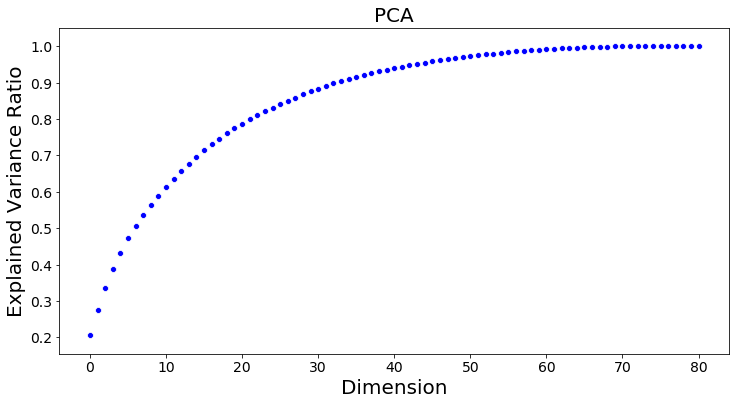

[0.20579874 0.27655534 0.33460995 0.38775151 0.43086607 0.47186256
 0.5064469  0.53599294 0.56322943 0.58919331 0.61290767 0.63549011
 0.65691751 0.67752102 0.69665478 0.71402772 0.73040502 0.74598397
 0.76067685 0.77428393 0.78697896 0.79891663 0.81029369 0.82101262
 0.8309592  0.84089709 0.8501183  0.85890082 0.86738326 0.87552669
 0.88327976 0.89089632 0.89754373 0.90365919 0.90943984 0.91512459
 0.92046618 0.92570403 0.93058538 0.93530019 0.93963571 0.94375861
 0.94768703 0.95133539 0.95482352 0.95817019 0.96143452 0.96448053
 0.96731034 0.96999571 0.97252231 0.97503577 0.97744108 0.9797317
 0.9818304  0.98386642 0.98575952 0.98745478 0.98900235 0.99043448]


In [26]:
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=variance,color='b')
ax.set_xlabel('Dimension', fontsize = 20)
ax.set_ylabel('Explained Variance Ratio', fontsize = 20)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.title("PCA", fontsize = 20)
plt.show()
print(variance[0:60])

In [27]:
pca = PCA(n_components=70)
pca.fit(X_train)
#train_input = pca.transform(X_train)
#test_input = pca.transform(X_test)
train_input = X_train
test_input = X_test
print(y_train)

[143000 143750 151000 ... 125500 145000 230000]


# Data Preprocessing before Machine Learning

In [28]:
# Tensorflow deep feed forward

activation_functions = ['elu', 'exponential', 'hard_sigmoid', 'linear', 'relu', 'selu']
i = 1 # 1 4 5
input_layer = Input(shape=(train_input.shape[1],))
dense_layer_1 = Dense(200, activation=activation_functions[i])(input_layer)
dense_layer_2 = Dense(130, activation=activation_functions[i])(dense_layer_1)
dense_layer_3 = Dense(60, activation=activation_functions[i])(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 81)]              0         
_________________________________________________________________
dense (Dense)                (None, 200)               16400     
_________________________________________________________________
dense_1 (Dense)              (None, 130)               26130     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                7860      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 50,451
Trainable params: 50,451
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
history = model.fit(train_input, y_train, batch_size=10, epochs=100, verbose=1, validation_split=0.2)

Train on 907 samples, validate on 227 samples
Epoch 1/100
907/907 [==============================] - 2s 2ms/sample - loss: 143406182723064.0938 - mean_squared_error: 143406189772800.0000 - val_loss: 34966734705.9031 - val_mean_squared_error: 34966732800.0000
Epoch 2/100
907/907 [==============================] - 0s 332us/sample - loss: 11484626131.8280 - mean_squared_error: 11484630016.0000 - val_loss: 16795306102.4141 - val_mean_squared_error: 16795307008.0000
Epoch 3/100
907/907 [==============================] - 0s 266us/sample - loss: 8218181076.5336 - mean_squared_error: 8218181120.0000 - val_loss: 15679887021.6740 - val_mean_squared_error: 15679887360.0000
Epoch 4/100
907/907 [==============================] - 0s 258us/sample - loss: 11493316108.9835 - mean_squared_error: 11493316608.0000 - val_loss: 21976911040.8458 - val_mean_squared_error: 21976911872.0000
Epoch 5/100
907/907 [==============================] - 0s 268us/sample - loss: 8126564016.5469 - mean_squared_error: 81265

Epoch 41/100
907/907 [==============================] - 0s 225us/sample - loss: 1395961889.6582 - mean_squared_error: 1395962240.0000 - val_loss: 2590769843.8767 - val_mean_squared_error: 2590769664.0000
Epoch 42/100
907/907 [==============================] - 0s 224us/sample - loss: 1343051092.8512 - mean_squared_error: 1343051008.0000 - val_loss: 3124011847.8943 - val_mean_squared_error: 3124012032.0000
Epoch 43/100
907/907 [==============================] - 0s 229us/sample - loss: 1304739270.0772 - mean_squared_error: 1304739200.0000 - val_loss: 2587402273.8326 - val_mean_squared_error: 2587401984.0000
Epoch 44/100
907/907 [==============================] - 0s 228us/sample - loss: 1508914472.5028 - mean_squared_error: 1508914432.0000 - val_loss: 3480814378.1498 - val_mean_squared_error: 3480814336.0000
Epoch 45/100
907/907 [==============================] - 0s 223us/sample - loss: 1352156693.6979 - mean_squared_error: 1352156544.0000 - val_loss: 2546769619.4537 - val_mean_squared_err

In [30]:
pred_train = model.predict(train_input)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(test_input)
print(np.sqrt(mean_squared_error(y_test,pred)))

34656.36099038558
45859.08579803786


In [31]:
# Random TF prediction function
def random_prediction(x: np.ndarray, model, n=5):
    size = x.shape[0]-1
    for _ in range(n):
        number = random.randint(0, size)
        y = y_test[number]
        y_hat = int(model.predict(test_input[number].reshape(1, -1))[0])
        print("Real price: ", y, " Predicted one: ", y_hat, " Error: ", int((y-y_hat)/y_hat*100), "%")

In [32]:
# Train folding (cross-val)
n = 6
cv = ShuffleSplit(n_splits=n, test_size=0.3, random_state=0)
print(cv)

ShuffleSplit(n_splits=6, random_state=0, test_size=0.3, train_size=None)


In [33]:
# Random sklearn prediction function
def random_prediction(x: np.ndarray, reg, n=5):
    size = x.shape[0]-1
    for _ in range(n):
        number = random.randint(0, size)
        y = y_test[number]
        y_hat = int(reg.predict(test_input[number].reshape(1, -1))[0])
        print(y_hat)
        print("Real price: ", y, " Predicted one: ", y_hat, " Error: ", int((y-y_hat)/y_hat*100), "%")

In [34]:
# sklearn prediction function
def prediction(x: np.ndarray, reg, n=5):
    y = np.zeros((n, 3))
    
    for i in range(n): 
        y[i,0] = y_test[i]
        y[i,1] = int(reg.predict(test_input[i].reshape(1, -1))[0])
        y[i,2] = y[i,1] - y[i,0]
        
    y_predicted = pd.DataFrame(y, columns=('Actual_Price','Prediction', 'Opportunity'))
    return y_predicted

# Machine Learning
### Support vector machine

C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


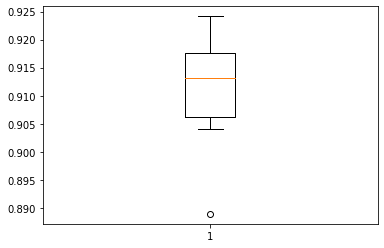

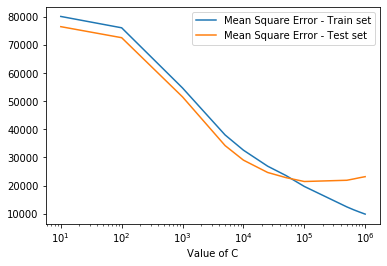

In [35]:
parameters = [1]
mse_report = np.zeros((len(parameters), n))
C = np.array([10, 100, 1000, 5000, 10000, 25000,50000,100000,500000,650000,800000,1000000])
MSETRAIN = np.empty([len(C)])
MSETEST = np.empty([len(C)])

for i, par in enumerate(parameters):
    for j in range(len(C)):
        reg = svm.SVR(kernel='rbf', gamma='scale', tol=0.0001, C=C[j], epsilon=0.0001)
        mse_report[i, :] = cross_val_score(reg, train_input, y_train, cv=cv)
        reg.fit(train_input, y_train)
        y_pred = reg.predict(test_input)
        y_pred_train = reg.predict(train_input)
        MSETRAIN[j] = sqrt(mean_squared_error(y_train, y_pred_train))
        MSETEST[j] = sqrt(mean_squared_error(y_test, y_pred))
        
        
plt.boxplot(mse_report.T)
mu_perf = np.mean(mse_report, axis=1)
std_perf = np.std(mse_report, axis=1)
max_perf = np.max(mse_report, axis=1)
min_perf = np.min(mse_report, axis=1)

reg.fit(train_input, y_train)
y_pred = reg.predict(test_input)
y_pred_train = reg.predict(train_input)


fig = plt.figure('Finding the minimum Mean Square error')

plt.plot(C,MSETRAIN, label = 'Mean Square Error - Train set')
plt.plot(C,MSETEST, label = 'Mean Square Error - Test set')
plt.legend(loc = 'best')
plt.xlabel('Value of C')
ax = fig.add_subplot(111)
ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()

In [36]:
print("MSE train: ", MSETRAIN[-1])
print("r2 score train: ", r2_score(y_train, y_pred_train))

print("MSE test: ", MSETEST[-1])
print("r2 score test: ", r2_score(y_test, y_pred))

MSE train:  9851.15350226157
r2 score train:  0.9842139370435967
MSE test:  23145.38249191425
r2 score test:  0.9021044516181187


In [37]:
random_prediction(x=test_input, reg=reg)

232268
Real price:  187500  Predicted one:  232268  Error:  -19 %
109155
Real price:  140000  Predicted one:  109155  Error:  28 %
256031
Real price:  240000  Predicted one:  256031  Error:  -6 %
224894
Real price:  220000  Predicted one:  224894  Error:  -2 %
252920
Real price:  215000  Predicted one:  252920  Error:  -14 %


### K Closest Neighbors 

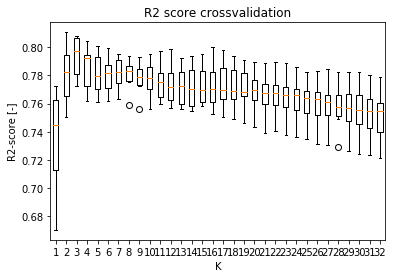

In [38]:
parameters = [i for i in range(1, 33)]
mse_report = np.zeros((len(parameters), n))
test_report = np.zeros((len(parameters), 2))

for i, par in enumerate(parameters):
        reg = KNeighborsRegressor(n_neighbors=par, n_jobs=-1)
        mse_report[i, :] = cross_val_score(reg, train_input, y_train, cv=cv)
        reg.fit(train_input, y_train)
        y_pred = reg.predict(train_input)
        test_report[i, 0] = mean_squared_error(y_train, y_pred)
        y_pred = reg.predict(test_input)
        test_report[i, 1] = mean_squared_error(y_test, y_pred)
        
        
        
plt.boxplot(mse_report.T)
plt.title('R2 score crossvalidation')
plt.xlabel('K')
plt.ylabel('R2-score [-]')
mu_perf = np.mean(mse_report, axis=1)
std_perf = np.std(mse_report, axis=1)
max_perf = np.max(mse_report, axis=1)
min_perf = np.min(mse_report, axis=1)

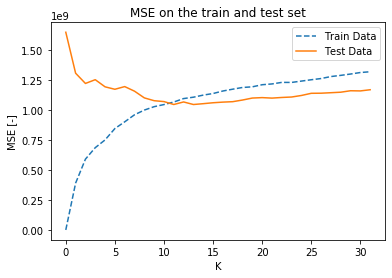

In [39]:
plt.plot(test_report[:, 0], "--", label = 'Train Data')
plt.plot(test_report[:, 1], label = 'Test Data')
plt.title('MSE on the train and test set')
plt.xlabel('K')
plt.ylabel('MSE [-]')
plt.legend()

In [40]:
king_parameter = 3
print(train_input.shape)
reg.fit(train_input, y_train)
y_pred = reg.predict(test_input)
y_pred_train = reg.predict(train_input)

print("MSE train: ", sqrt(mean_squared_error(y_train, y_pred_train)))
print("r2 score train: ", r2_score(y_train, y_pred_train))

print("MSE test: ", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score test: ", r2_score(y_test, y_pred))

(1134, 81)
MSE train:  36293.772553772615
r2 score train:  0.7857287593320097
MSE test:  34166.8934598292
r2 score test:  0.7866733044882093


In [41]:
random_prediction(x=test_input, reg=reg)

291287
Real price:  385000  Predicted one:  291287  Error:  32 %
130135
Real price:  139000  Predicted one:  130135  Error:  6 %
205237
Real price:  196000  Predicted one:  205237  Error:  -4 %
257325
Real price:  320000  Predicted one:  257325  Error:  24 %
121629
Real price:  109008  Predicted one:  121629  Error:  -10 %


### Random Forest 

In this section, the random forest model is used as regressor. The number of trees and the depth of the trees are the two hyper parameters that are optimized using the cross validation score. The boxplot representation demonstrates a small variation throughout the different settings. Therefore, the MSE and R2 score of each settings are calculated to have a better understanding on the impact of the hyperparameter settings.

In [42]:
parameters = [(100, 50), (100, 20), (100, 7), (100, 5), (50, 50), (50, 20), (50, 7), (50, 5), 
              (10, 50), (10, 20), (10, 7), (10, 5)]

cross_val = np.zeros((len(parameters), n))
mse_report = np.zeros((2, (len(parameters))))
r2score_report = np.zeros((2, (len(parameters))))

for i, par in enumerate(parameters):
        reg = RandomForestRegressor(n_estimators=par[0], max_depth=par[1], max_features = 60)
        cross_val[i, :] = cross_val_score(reg, train_input, y_train, cv=cv)
        
        reg.fit(train_input, y_train)
        y_pred = reg.predict(test_input)
        y_pred_train = reg.predict(train_input)
                      
        mse_report[0, i] = sqrt(mean_squared_error(y_train, y_pred_train))
        r2score_report[0, i] = r2_score(y_train, y_pred_train)
        mse_report[1, i] = sqrt(mean_squared_error(y_test, y_pred))
        r2score_report[1, i] = r2_score(y_test, y_pred)
        
plt.boxplot(cross_val.T)
mu_perf = np.mean(cross_val, axis=1)
std_perf = np.std(cross_val, axis=1)
max_perf = np.max(cross_val, axis=1)
min_perf = np.min(cross_val, axis=1)


NameError: name 'RandomForestRegressor' is not defined

In [ ]:
plt.plot(mse_report[0, :], "--", label = 'MSE Train set')
plt.plot(mse_report[1, :], label = 'MSE Test set')
plt.xlabel('Settings')
plt.ylabel('MSE [$]')
plt.title('Finding the minimum Mean Square error')

plt.figure()
plt.plot(r2score_report[0, :], "--", label = 'R2 score Train set')
plt.plot(r2score_report[1, :], label = 'R2 score Test set')
plt.xlabel('Settings')
plt.ylabel('R2 score [-]')
plt.title('Finding the minimum R2 score')
plt.legend()
plt.show()

The performances of the algorithm does not depend much on the number of trees that are grown as long as there are sufficient trees in the forest (in our case more than 10 seems to be enough). On the other side, the depth of the trees have a certain impact on the MSE and R2 scores. Above 7 partitionning, the algorithm tends to overfit the data with a R2 score of above 98%. However, the best performances on the test set are also obtained when the number of splitting is high. Therefore, the hyperparameters are set to 50 trees and 20 layers as a trade off between avoiding overfitting and having good performances.

In [ ]:
king_parameter = (50, 20)
mse_report = np.zeros((2, 10))
r2score_report = np.zeros((2, 10))
for i in range(10):
                              
        reg = RandomForestRegressor(n_estimators=king_parameter[0], max_depth=king_parameter[1], max_features = 60)
        reg.fit(train_input, y_train)
        y_pred = reg.predict(test_input)
        y_pred_train = reg.predict(train_input)
                      
        mse_report[0, i] = sqrt(mean_squared_error(y_train, y_pred_train))
        r2score_report[0, i] = r2_score(y_train, y_pred_train)
        mse_report[1, i] = sqrt(mean_squared_error(y_test, y_pred))
        r2score_report[1, i] = r2_score(y_test, y_pred)

### Neural Network

In [ ]:
parameters = [(100, 75, 50, 25), (100, 66, 33), (100, 50), (100,)]
mse_report = np.zeros((len(parameters), n))

for i, par in enumerate(parameters):
        reg = MLPRegressor(hidden_layer_sizes=par, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
        print(reg.get_params())
        mse_report[i, :] = cross_val_score(reg, train_input, y_train, cv=cv)
        
plt.boxplot(mse_report.T)
mu_perf = np.mean(mse_report, axis=1)
std_perf = np.std(mse_report, axis=1)
max_perf = np.max(mse_report, axis=1)
min_perf = np.min(mse_report, axis=1)

In [ ]:
king_parameter = (100, 75, 50, 25)

reg = MLPRegressor(hidden_layer_sizes=king_parameter, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
reg.fit(train_input, y_train)

y_pred = reg.predict(test_input)
y_pred_train = reg.predict(train_input)

print("MSE train: ", sqrt(mean_squared_error(y_train, y_pred_train)))
print("r2 score train: ", r2_score(y_train, y_pred_train))

print("MSE test: ", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score test: ", r2_score(y_test, y_pred))

In [ ]:
random_prediction(x=test_input, reg=reg, n=5)

### Business Analysis 

The Opportunity columns represent the possible profit we could make by buying the house.

In [ ]:
results = prediction(x=test_input, reg=reg, n=len(test_input))
Opportunity = results.sort_values(['Opportunity'], ascending=False,)
print(Opportunity[:10])